In [23]:
from lut3d import *
import numpy as np
import cv2
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import os

In [ ]:
lut = Lut3D()
optimizer = optim.Adam(lut.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

In [127]:
file_name =  "./umbrellaL.png"
basename = os.path.basename(file_name).split('.')[0]
img = cv2.imread(file_name)
target = cv2.imread('{}_out.jpg'.format(basename))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB).astype(np.float32)
imgRaw = img/255.
targetRaw = target / 255.
img = np.expand_dims(imgRaw, 0)
img = torch.tensor(img)
img = torch.permute(img, (0,3,1,2))
target = np.expand_dims(targetRaw, 0)
target = torch.tensor(target)
target = torch.permute(target, (0,3,1,2))

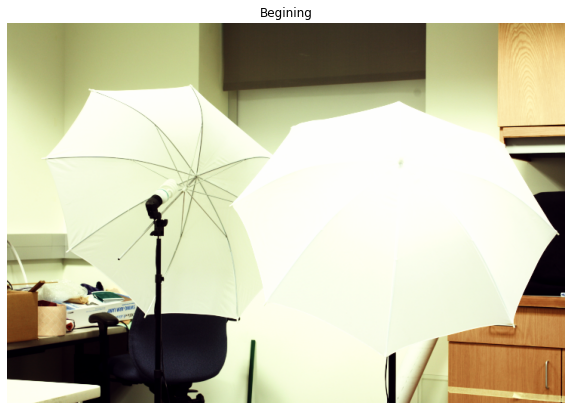

In [128]:
with torch.no_grad():
    new_img = lut(img)
    imgS = new_img.cpu().detach()
    imgS = torch.squeeze(imgS)
    imgS = torch.permute(imgS, (1,2,0)).numpy()
    imgS *= 255
    imgS = imgS.astype(np.uint8)
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(imgS)
    plt.title("Begining")
    plt.show()

In [122]:
def lut_loss(lut):
    less = (lut[(lut < 0)]) ** 2
    upper = (lut[(lut > 1)] - 1) ** 2
    dx = lut[:, :-1, :, :] - lut[:, 1:, :, :]
    dy = lut[:, :, :-1, :] - lut[:, :, 1:, :]
    dz = lut[:, :, :, :-1] - lut[:, :, :, 1:]
    mn =  torch.relu(dx).mean() + torch.relu(dy).mean() + torch.relu(dz).mean()
    tv =  torch.mean(dx ** 2) + torch.mean(dy ** 2)  + torch.mean(dz ** 2)
    return less.sum() + upper.sum() + mn + tv
creition = torch.nn.L1Loss()

In [129]:
for i in range(1000):
    new_img = lut(img)
    lut_l = lut_loss(lut.LUT)
    l1_l = creition(new_img, target)
    loss = lut_l + l1_l
    if (i+1) % 100 == 0:
        print("Epoch: {}, loss: {:4f}, lut loss {:.4f}, l1 loss {:.4f}".format(i+1, loss, lut_l, l1_l))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 100, loss: 0.007887, lut loss 0.0031, l1 loss 0.0047
Epoch: 200, loss: 0.007703, lut loss 0.0030, l1 loss 0.0047
Epoch: 300, loss: 0.007560, lut loss 0.0028, l1 loss 0.0047
Epoch: 400, loss: 0.007450, lut loss 0.0027, l1 loss 0.0047
Epoch: 500, loss: 0.007357, lut loss 0.0026, l1 loss 0.0047
Epoch: 600, loss: 0.007277, lut loss 0.0026, l1 loss 0.0047
Epoch: 700, loss: 0.007209, lut loss 0.0025, l1 loss 0.0047
Epoch: 800, loss: 0.007145, lut loss 0.0024, l1 loss 0.0047
Epoch: 900, loss: 0.007092, lut loss 0.0024, l1 loss 0.0047
Epoch: 1000, loss: 0.007048, lut loss 0.0023, l1 loss 0.0047


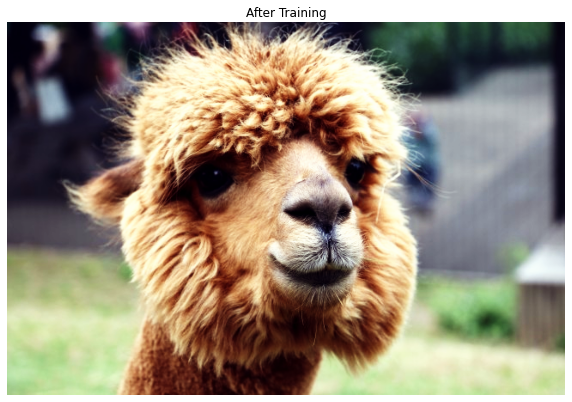

In [124]:
with torch.no_grad():
    new_img = lut(img)
    imgS = new_img.cpu().detach()
    imgS = torch.squeeze(imgS)
    imgS = torch.permute(imgS, (1,2,0)).numpy()
    imgS *= 255
    imgS = imgS.astype(np.uint8)
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(imgS)
    plt.title("After Training")
    plt.show()

In [19]:
def inference(lut, img_file):
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
    img /= 255.
    img = np.expand_dims(img, 0)
    img = torch.tensor(img)
    img = torch.permute(img, (0,3,1,2))
    
    with torch.no_grad():
        new_img = lut(img)
        imgS = new_img.cpu().detach()
        imgS = torch.squeeze(imgS)
        imgS = torch.permute(imgS, (1,2,0)).numpy()
        imgS *= 255
        imgS = imgS.astype(np.uint8)
        plt.figure(figsize=(10,10))
        plt.axis('off')
        plt.imshow(imgS)
        plt.show()

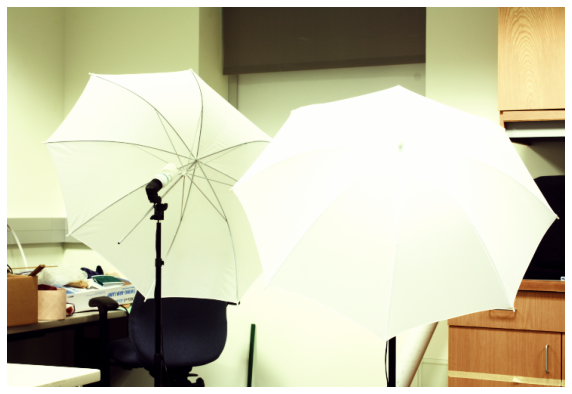

In [126]:
inference(lut,"./umbrellaL.png")